# Example for Comparative Statics


Author: Daniel Csaba

Date: October 2018

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from blahut_arimoto import Blahut_Arimoto

from matplotlib.collections import LineCollection

sns.set_style('whitegrid')
colors = sns.color_palette()

# use latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# parameters of the decision problem

# initial belief over states
mu = np.array([2/6, 2/6, 2/6])

# payoff matrix in utility (state X action)
U = np.array([[9,  18, 15],
              [13, 14, 15],
              [20, 10, 15]])

# scaler for information processing budget
k = 1

RI_0 = Blahut_Arimoto(U, k, mu)

In [3]:
print('RATIONAL INATTENTION MODEL')
print('========================================')
print('Unconditional choice probabilities')
print('========================================')
print(RI_0.unconditional_prob)

print('\n========================================')
print('Optimal experiment')
print('========================================')
print(RI_0.opt_exp)

print('\n========================================')
print('Ex-ante EU under the prior')
print('========================================')
print(mu@U)

RATIONAL INATTENTION MODEL
Unconditional choice probabilities
[0.38251659 0.51056976 0.10691365]

Optimal experiment
[[0.0000915  0.98959157 0.01031693]
 [0.14939836 0.54205721 0.30854442]
 [0.99805991 0.00006048 0.00187961]]

Ex-ante EU under the prior
[14. 14. 15.]


## Changes in the environment

### Uniform change in information costs

### Shannon cost

In [4]:
def K(cond, uncond, mu):
    '''Computes value of mutual information.'''
    return (mu@(uncond*np.log(uncond/cond))).sum()

In [5]:
# set range for the multiplier on the cost function
k_range = np.linspace(.1, 11, 50)

RI_uncond = []
RI_exp = []
for k in k_range:
    RI = Blahut_Arimoto(U, k, mu)
    RI_uncond.append(RI.unconditional_prob)
    RI_exp.append(RI.opt_exp)

RI_uncond = np.array(RI_uncond)
RI_exp = np.array(RI_exp)

In [6]:
# save mutual information of optimal information structure
MI = []
for i in range(len(k_range)):
    MI.append(K(RI_exp[i], RI_uncond[i], mu))
    
MI = np.array(MI)

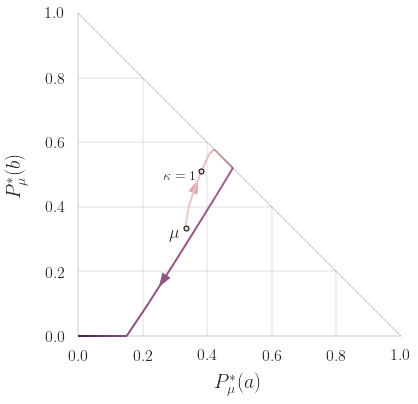

In [7]:
cmap = sns.cubehelix_palette(as_cmap=True)#sns.dark_palette("purple", as_cmap=True) #
colors = sns.cubehelix_palette()

c_range = np.linspace(0, 1, 50)

sns.set_style('white')

points = np.array([RI_uncond[:,0], RI_uncond[:,1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig, ax = plt.subplots(figsize=(6, 6))

x = np.linspace(0., 1, 100)
y = np.linspace(0., 1, 100)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# simplex
ax.plot(x, 1-y, color='k', lw=.4, alpha=.5)
ax.hlines(0, 0, 1, lw=.4, alpha=.5, clip_on=False)
ax.vlines(0, 0, 1, lw=.4, alpha=.5)
# simplex grid
grid = [.2, .4, .6, .8]
ax.hlines(grid, [0], grid[::-1], lw=.4, alpha=.3)
ax.vlines(grid, [0], grid[::-1], lw=.4, alpha=.3)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(c_range.min(), c_range.max())
lc = LineCollection(segments, cmap=cmap, norm=norm, clip_on=False)

# Set the values used for colormapping
lc.set_array(c_range)
lc.set_linewidth(2)
line = ax.add_collection(lc)

# points for arrows
f1 = 3
arr_x11, arr_y11 = (RI_uncond[f1,0]+RI_uncond[f1+1,0])/2, (RI_uncond[f1,1]+RI_uncond[f1+1,1])/2
arr_x12, arr_y12 = (.4*RI_uncond[f1,0]+.6*RI_uncond[f1+1,0]), (.4*RI_uncond[f1,1]+.6*RI_uncond[f1+1,1])
f2 = 30
arr_x21, arr_y21 = (RI_uncond[f2,0]+RI_uncond[f2+1,0])/2, (RI_uncond[f2,1]+RI_uncond[f2+1,1])/2
arr_x22, arr_y22 = (.4*RI_uncond[f2,0]+.6*RI_uncond[f2+1,0]), (.4*RI_uncond[f2,1]+.6*RI_uncond[f2+1,1])
# arrows
ax.arrow(arr_x11, arr_y11, arr_x12-arr_x11, arr_y12-arr_y11, shape='full',
         lw=0, length_includes_head=True, head_width=.03, color=colors[1])
ax.arrow(arr_x21, arr_y21, arr_x22-arr_x21, arr_y22-arr_y21, shape='full',
         lw=0, length_includes_head=True, head_width=.03, color=colors[3])


# some markers
ax.plot(mu[0], mu[1], 'o', markersize=5, markeredgecolor='k', color=colors[0])
ax.text(mu[0]-.05, mu[1]-.03, r'$\mu$', fontsize=18)
ax.plot(RI_0.unconditional_prob[0], RI_0.unconditional_prob[1], 'o', markersize=5, markeredgecolor='k', color=colors[0])
ax.text(RI_0.unconditional_prob[0]-.12, RI_0.unconditional_prob[1]-.03, r'$\kappa=1$', fontsize=14)

ax.set_xlabel(r'$P^*_\mu(a)$', fontsize=20, labelpad=10)
ax.set_ylabel(r'$P^*_\mu(b)$', fontsize=20, labelpad=15)

ax.tick_params(labelsize=16, pad=10)
ax.set(aspect='equal')
ax.set_ylim([-.01, 1])
ax.set_xlim([-.01, 1])
plt.savefig('../Figures/example_shannon_expansion.pdf', format = 'pdf', dpi = 1000, bbox_inches='tight')
plt.show()

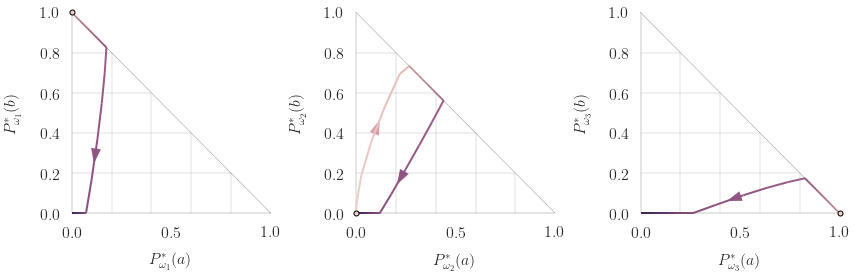

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x = np.linspace(0., 1, 100)
y = np.linspace(0., 1, 100)

for index, ax in enumerate(axes):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # simplex
    ax.plot(x, 1-y, color='k', lw=.4, alpha=.5)
    ax.hlines(0, 0, 1, lw=.4, alpha=.5, clip_on=False)
    ax.vlines(0, 0, 1, lw=.4, alpha=.5)
    # simplex grid
    grid = [.2, .4, .6, .8]
    ax.hlines(grid, [0], grid[::-1], lw=.4, alpha=.3)
    ax.vlines(grid, [0], grid[::-1], lw=.4, alpha=.3)
    
    points = np.array([RI_exp[:,index,0], RI_exp[:,index,1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors
    lc = LineCollection(segments, cmap=cmap, norm=norm, clip_on=False)

    # Set the values used for colormapping
    lc.set_array(c_range)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)

    ax.plot(RI_exp[0,index,0], RI_exp[0,index,1], 'o', ms=5, markeredgecolor='k', clip_on=False, color=colors[0])
    
    # points for arrows
    f1 = 3
    arr_x11, arr_y11 = (RI_exp[f1,index,0]+RI_exp[f1+1,index,0])/2, (RI_exp[f1,index,1]+RI_exp[f1+1,index,1])/2
    arr_x12, arr_y12 = (.4*RI_exp[f1,index,0]+.6*RI_exp[f1+1,index,0]), (.4*RI_exp[f1,index,1]+.6*RI_exp[f1+1,index,1])
    f2 = 30
    arr_x21, arr_y21 = (RI_exp[f2,index,0]+RI_exp[f2+1,index,0])/2, (RI_exp[f2,index,1]+RI_exp[f2+1,index,1])/2
    arr_x22, arr_y22 = (.4*RI_exp[f2,index,0]+.6*RI_exp[f2+1,index,0]), (.4*RI_exp[f2,index,1]+.6*RI_exp[f2+1,index,1])
    # arrows
    ax.arrow(arr_x11, arr_y11, arr_x12-arr_x11, arr_y12-arr_y11, shape='full',
             lw=0, length_includes_head=True, head_width=.05, color=colors[1])
    ax.arrow(arr_x21, arr_y21, arr_x22-arr_x21, arr_y22-arr_y21, shape='full',
             lw=0, length_includes_head=True, head_width=.05, color=colors[3])
    
    ax.set_xlabel(r'$P^*_{{\omega_{}}}(a)$'.format(index+1), fontsize=16, labelpad=15)
    ax.set_ylabel(r'$P^*_{{\omega_{}}}(b)$'.format(index+1), fontsize=16, labelpad=15)
    
    ax.tick_params(labelsize=16, pad=10)
    ax.set_ylim([-.01, 1])
    ax.set_xlim([-.01, 1])

plt.tight_layout()
plt.savefig('../Figures/example_shannon_expansion_cond.pdf', format = 'pdf', dpi = 1000,  bbox_inches='tight') #
plt.show()

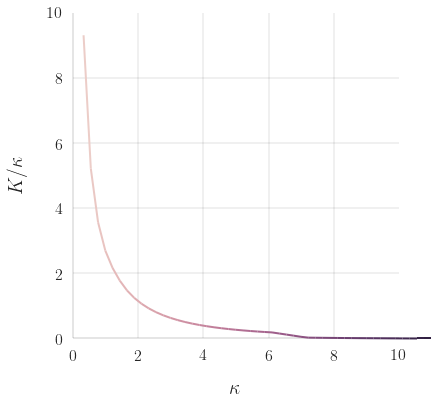

In [9]:
points = np.array([k_range, MI]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(6, 6))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# splines
ax.hlines(0, 0, 10, lw=.4, alpha=.5, clip_on=False)
ax.vlines(0, 0, 10, lw=.4, alpha=.5, clip_on=False)
# grid
grid = [2, 4, 6, 8]
ax.hlines(grid, [0], [10], lw=.4, alpha=.3)
ax.vlines(grid, [0], [10], lw=.4, alpha=.3)

# Create a continuous norm to map from data points to colors
lc = LineCollection(segments[1:], cmap=cmap, norm=norm, clip_on=False)

# Set the values used for colormapping
lc.set_array(c_range[1:])
lc.set_linewidth(2)
#lc.set_ylim([0, 10])
line = ax.add_collection(lc)

#ax.plot(k_range, MI, color=colors[3])

ax.set_xlabel(r'$\kappa$', fontsize=20, labelpad=15)
ax.set_ylabel(r'$K/\kappa$', fontsize=20, labelpad=20)

ax.tick_params(labelsize=16, pad=10)
ax.set(aspect='equal')
ax.set_ylim([-.01, 10])
ax.set_xlim([-.01, 10])
plt.savefig('../Figures/example_shannon_expansion_cost.pdf', format = 'pdf', dpi = 1000, bbox_inches='tight')
plt.show()

## Change in the payoff of a single state-action pair


Suppose action $a$ becomes more attractive in state $\omega_1$. Interested in the change of the whole ''demand system''.

$$ \frac{\partial Q^*}{\partial u(a(\omega_1))}$$

In [10]:
# set range for payoff change
k = 1
du_range = np.linspace(0, 8, 15)

RI_a1_uncond = []
RI_a1_exp = []


for du in du_range:
    U_du = U + np.array([[du, 0, 0], [0, 0, 0], [0, 0, 0]])
    RI = Blahut_Arimoto(U_du, k, mu)
    RI_a1_uncond.append(RI.unconditional_prob)
    RI_a1_exp.append(RI.opt_exp)

RI_a1_uncond = np.array(RI_a1_uncond)
RI_a1_exp = np.array(RI_a1_exp)

In [11]:
# save mutual information of optimal information structure
MI_du = []

for i in range(len(du_range)):
    MI_du.append(K(RI_a1_exp[i], RI_a1_uncond[i], mu))
    
MI_du = np.array(MI_du)

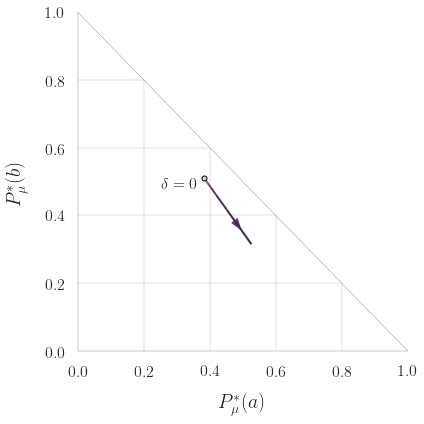

In [13]:
points = np.array([RI_a1_uncond[:,0], RI_a1_uncond[:,1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig, ax = plt.subplots(figsize=(6, 6))

x = np.linspace(0., 1, 100)
y = np.linspace(0., 1, 100)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# simplex
ax.plot(x, 1-y, color='k', lw=.4, alpha=.5)
ax.hlines(0, 0, 1, lw=.4, alpha=.5, clip_on=False)
ax.vlines(0, 0, 1, lw=.4, alpha=.5)
# simplex grid
grid = [.2, .4, .6, .8]
ax.hlines(grid, [0], grid[::-1], lw=.4, alpha=.3)
ax.vlines(grid, [0], grid[::-1], lw=.4, alpha=.3)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(du_range.min(), du_range.max())
lc = LineCollection(segments, cmap=cmap, norm=norm, clip_on=False)

# Set the values used for colormapping
lc.set_array(du_range)
lc.set_linewidth(2)
line = ax.add_collection(lc)

# points for arrows
f1 = 13
arr_x11, arr_y11 = (RI_a1_uncond[f1,0]+RI_a1_uncond[f1+1,0])/2, (RI_a1_uncond[f1,1]+RI_a1_uncond[f1+1,1])/2
arr_x12, arr_y12 = (.4*RI_a1_uncond[f1,0]+.6*RI_a1_uncond[f1+1,0]), (.4*RI_a1_uncond[f1,1]+.6*RI_a1_uncond[f1+1,1])

# arrows
ax.arrow(arr_x11, arr_y11, arr_x12-arr_x11, arr_y12-arr_y11, shape='full',
         lw=0, length_includes_head=True, head_width=.025, color=colors[4])



ax.plot(RI_a1_uncond[0,0], RI_a1_uncond[0,1], 'o', ms=5, markeredgecolor='k', clip_on=False, color=colors[0])
ax.text(RI_a1_uncond[0,0]-.13, RI_a1_uncond[0,1]-.03, r'$\delta=0$', fontsize=16)

ax.set_xlabel(r'$P^*_\mu(a)$', fontsize=20, labelpad=15)
ax.set_ylabel(r'$P^*_\mu(b)$', fontsize=20, labelpad=15)

ax.tick_params(labelsize=16, pad=10)

ax.set_ylim([-.01, 1])
ax.set_xlim([-.01, 1])
plt.tight_layout()
plt.savefig('../Figures/example_shannon_singlepayoff.pdf', format = 'pdf', dpi = 1000, bbox_inches='tight')
plt.show()


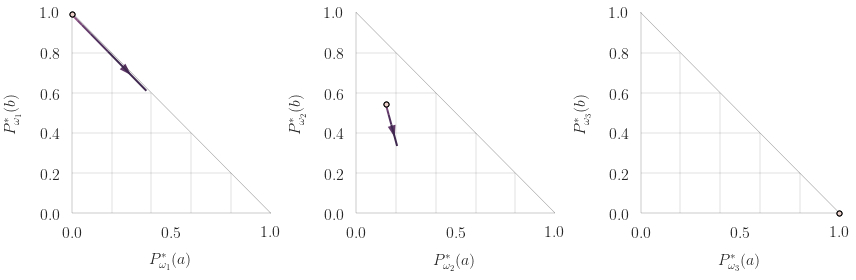

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x = np.linspace(0., 1, 100)
y = np.linspace(0., 1, 100)


for index, ax in enumerate(axes):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # simplex
    ax.plot(x, 1-y, color='k', lw=.4, alpha=.5)
    ax.hlines(0, 0, 1, lw=.4, alpha=.5, clip_on=False)
    ax.vlines(0, 0, 1, lw=.4, alpha=.5)
    # simplex grid
    grid = [.2, .4, .6, .8]
    ax.hlines(grid, [0], grid[::-1], lw=.4, alpha=.3)
    ax.vlines(grid, [0], grid[::-1], lw=.4, alpha=.3)
    
    points = np.array([RI_a1_exp[:,index,0], RI_a1_exp[:,index,1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors
    lc = LineCollection(segments, cmap=cmap, norm=norm, clip_on=False)

    # Set the values used for colormapping
    lc.set_array(du_range)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)

    ax.plot(RI_a1_exp[0,index,0], RI_a1_exp[0,index,1], 'o', ms=5, markeredgecolor='k', clip_on=False, color=colors[0])
    
    # points for arrows
    f1 = 13
    arr_x11, arr_y11 = (RI_a1_exp[f1,index,0]+RI_a1_exp[f1+1,index,0])/2, (RI_a1_exp[f1,index,1]+RI_a1_exp[f1+1,index,1])/2
    arr_x12, arr_y12 = (.4*RI_a1_exp[f1,index,0]+.6*RI_a1_exp[f1+1,index,0]), (.4*RI_a1_exp[f1,index,1]+.6*RI_a1_exp[f1+1,index,1])
    # arrows
    ax.arrow(arr_x11, arr_y11, arr_x12-arr_x11, arr_y12-arr_y11, shape='full',
             lw=0, length_includes_head=True, head_width=.04, color=colors[4])


    ax.plot(RI_a1_exp[0,index,0], RI_a1_exp[0,index,1], 'o', ms=5, markeredgecolor='k', clip_on=False, color=colors[0])
    
    ax.set_xlabel(r'$P^*_{{\omega_{}}}(a)$'.format(index+1), fontsize=16, labelpad=15)
    ax.set_ylabel(r'$P^*_{{\omega_{}}}(b)$'.format(index+1), fontsize=16, labelpad=15)
    
    ax.tick_params(labelsize=16, pad=10)
    ax.set_ylim([-.01, 1])
    ax.set_xlim([-.01, 1])


plt.tight_layout()
plt.savefig('../Figures/example_shannon_singlepayoff_cond.pdf', format = 'pdf', dpi = 1000, bbox_inches='tight')
plt.show()

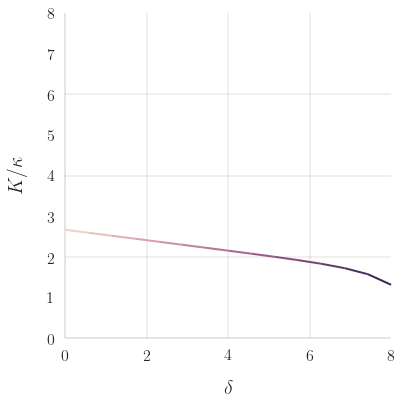

In [15]:
points = np.array([du_range, MI_du]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(6, 6))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# splines
ax.hlines(0, 0, 8, lw=.4, alpha=.5, clip_on=False)
ax.vlines(0, 0, 8, lw=.4, alpha=.5, clip_on=False)
# grid
grid = [2, 4, 6]
ax.hlines(grid, [0], [8], lw=.4, alpha=.3)
ax.vlines(grid, [0], [8], lw=.4, alpha=.3)

# Create a continuous norm to map from data points to colors
lc = LineCollection(segments, cmap=cmap, norm=norm, clip_on=False)

# Set the values used for colormapping
lc.set_array(du_range)
lc.set_linewidth(2)
line = ax.add_collection(lc)


ax.set_xlabel(r'$\delta$', fontsize=20, labelpad=15)
ax.set_ylabel(r'$K/\kappa$', fontsize=20, labelpad=20)

ax.tick_params(labelsize=16, pad=10)
ax.set(aspect='equal')
ax.set_ylim([-.01, 8])
ax.set_xlim([-.01, 8])

plt.savefig('../Figures/example_shannon_singlepayoff_cost.pdf', format = 'pdf', dpi = 1000, bbox_inches='tight')
plt.show()